In [1]:
# Imports

In [1]:
from Ian import client_functions, pd, np, clusters, equal_in, Benchmarks
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.backends import backend_pdf

style.use('fivethirtyeight')

cerner_colors = [
    '#0d94d2', # Blue
    '#7bc143', # Green
    '#6a737b', # Grey
    '#4bb8ef', # Cyan
    '#7c2b83', # Purple
    '#f58025', # Orange
    '#fdb913'  # Yellow
]

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=cerner_colors)

%matplotlib inline

# Connection

In [2]:
user = 'JM025575'
password = 'Louieandfiona20172019!'
client = "IHC_UT"
i = client_functions(**{
    'host' : '10.23.80.131',
    'user' : f'{user}',
    'password' : f'{password}',
    'schema' : 'INTERMOUNTAIN',
    'population_id' : 'e9a85078-ff1f-40b0-9894-402e56c4b679'
})

# Test

In [3]:
# cluster
i.query_df(f"""
SELECT GETDATE()
""")

,GETDATE
0,2020-02-28 08:47:34.786030


In [4]:
# schema
i.query_df(i.person_query(), 1)

,population_id,empi_id,full_name,birth_date_id,birth_date,deceased,deceased_date_id,deceased_dt_tm,gender_primary_display
0,741ca202-b39a-440e-beb0-a0a86ce7d90c,b1329499-8a97-4ce4-820d-307db047a8d6,"CANALES, THELMA PATRICIA",19760111,1976-01-11,False,0,None,Female


# Data

In [5]:
dates = Benchmarks.dream_dates('2019Q4')

In [6]:
dates

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01'], dtype='datetime64[ns]', freq='MS')

In [7]:
registries = [
    'atrisk'
]

In [8]:
#scorable>False dashboard_histories table, True>scorecard_trending
q = Benchmarks.query(schema=i.schema, dream_dates=dates, scorable = True, measure_type = 'custom', registries=registries)

In [9]:
print(q)


        SELECT DISTINCT
            'INTERMOUNTAIN' AS client,
            q.*
        FROM
            (
            SELECT DISTINCT
                population_id,
                created_dt_tm AS date,
                prsnl_id,
                fully_qualified_name,
                numerator_value AS numerator,
                denominator_value AS denominator
            FROM
                INTERMOUNTAIN.PH_F_Scorecard_Trending_Personnel_Point
            WHERE
                created_dt_tm BETWEEN DATE('2019-09-15') AND DATE('2019-12-15')
                AND denominator_value > 0
            ) q
            JOIN (
                SELECT DISTINCT
                    a.*
                FROM
                    (
            SELECT DISTINCT
                fully_qualified_name,
                prsnl_id,
                COUNT(DISTINCT created_dt_tm) AS dt_count
            FROM
                INTERMOUNTAIN.PH_F_Scorecard_Trending_Personnel_Point
            WHERE
                crea

In [10]:
q = ("""
SELECT DISTINCT
            'INTERMOUNTAIN' AS client,
            q.*
        FROM
            (
            SELECT DISTINCT
                population_id,
                created_dt_tm AS date,
                prsnl_id,
                fully_qualified_name,
                numerator_value AS numerator,
                denominator_value AS denominator
            FROM
                INTERMOUNTAIN.PH_F_Scorecard_Trending_Personnel_Point
            WHERE
                created_dt_tm BETWEEN DATE('2019-09-15') AND DATE('2019-12-16')
                AND denominator_value > 0
            ) q
            JOIN (
                SELECT DISTINCT
                    a.*
                FROM
                    (
            SELECT DISTINCT
                fully_qualified_name,
                prsnl_id,
                COUNT(DISTINCT created_dt_tm) AS dt_count
            FROM
                INTERMOUNTAIN.PH_F_Scorecard_Trending_Personnel_Point
            WHERE
                created_dt_tm BETWEEN DATE('2019-09-15') AND DATE('2019-12-16')
                AND denominator_value > 0
            GROUP BY
                fully_qualified_name,
                prsnl_id
            ) a
                WHERE
                    SPLIT_PART(fully_qualified_name, '.', 1) = 'intermountain'
                
                AND SPLIT_PART(fully_qualified_name, '.', 2) = 'atrisk'
                ) d ON (
                q.fully_qualified_name = d.fully_qualified_name
                AND q.prsnl_id = d.prsnl_id
                AND d.dt_count >= 3
            )
""")

In [11]:
fqn = """intermountain.atrisk.clinical/hba1c-poorly-controlled-hba1c-gt-9
""".split('\n')

In [12]:
fqn

['intermountain.atrisk.clinical/hba1c-poorly-controlled-hba1c-gt-9', '']

In [13]:
providers = """9230afec-0097-421a-bd0c-b63cfaed452c
d4957497-1081-40c6-b463-f9c1d888b6c8
1a7cbd55-e9ee-4e0d-b0cc-dea298ed3281
fed9a14f-4db6-4b54-80a8-894afcdb5d94
868abc7f-96d9-4854-ad3c-b7ff254a4c39
abc4aef2-5962-4a96-97e6-5d9013983d00
ddac6946-4beb-4fd0-9341-6d1e99e7b449
4ee1ab1a-f441-4c43-af27-2540307308f6
04d0e6b1-d010-4672-8aaf-740fbb510961
974c83f6-2367-45cf-aa7a-0d6786adbd7a
940bf639-9d0e-45d3-8879-87628dc5bbd0
f1a05333-8e2f-45c4-85cc-0bfa5cff30b3
8fcf1365-df47-4f10-8981-ae3ef9b4fccb
0f3ab992-e101-41cc-849c-a031b75af8f1
c02cee83-0877-43f5-b176-b9d6e99a3683
3630b8e7-e408-40d6-abf7-1b027779c1c2
cb9e2609-fc54-496d-9358-34933fb04353
9a7e023a-0cc1-4e35-bec3-22e3a38e3e3a
32b8204c-67f0-4ea5-9f14-db81e89b1ab8
768012ee-1228-4267-9e43-335da1ecafdd
1a42aed2-a87e-4520-bf15-ba8bf32ef339
c03eecbe-de0e-4bf8-a094-1601cc3d0fbf
b15d577c-aab8-4a35-95e3-9a62e5101f46
03a712ab-1ceb-44a1-8d56-e1ec04953f9c
d0dfd9e8-84b8-44ff-bd01-124965fe816f
be0c01a1-839b-493c-a2e8-816ee5fb323e
d513ffca-4232-4396-80bf-9ca9a1628890
ba00921b-3a97-4812-8e76-e61f49547dd5
0db87834-7a98-471d-aa07-9ade03751e77
69b6dc45-c6d7-4c15-92e7-d1b6a7490fe2
5b50333d-44a1-4c01-a269-37b29a0a8016
1b3d8dff-6f03-480c-8799-a79b6ad8919e
5fef85e2-08b7-4200-99e1-acbc13cfbbd3
abd4a756-8f83-4fbc-a611-de60d6a38b06
7c51e08b-a3cb-4fb8-bb1e-133391c69d9a
a87e7035-f5ad-4759-bff8-b75583aec35c
73bafa75-e20f-4d20-a6be-6a4d694fb022
ed9462fa-85bc-4909-82f3-7f0bdd184512
5c5e1bbb-9eb9-4cd7-a5d0-73b06ea2827b
b8654e52-e7a0-4687-ae06-aa2f0ed3e27b
d31abc78-c98e-42da-b0d6-faaa3dca4dcb
76f2668b-92ba-4681-bb0e-d7fd659fb5c0
08cde84a-6bec-4c70-bc7c-f1f4d0644cb2
e9dee6c4-3e02-4b23-8894-c9dd891b63ad
c19e8efd-9375-4d03-ae9e-9d959acd9af6
597efb7b-1010-4a4f-8c69-7e6711f56266
250bbf24-8f44-4096-900d-358fcc75582a
250d57f3-10be-4229-b1d6-0816d92c5da5
07205ecf-dd63-45fe-a023-1ff28b014083
d42ce9dd-1883-4390-b77c-321b422bfc7c
8edd92a3-565d-4047-9d84-2f8b55f9c3e8
ddc92f4a-ea7f-4e9b-88cb-6d63c969f285
a0424018-23a2-43e8-ba91-2347a35351b2
b1feffb3-742a-46e7-96b1-e3e74008e149
c2f8e83b-4ae3-4848-9fa5-9d4149fc6167
342893d0-3130-440e-ab89-a6311195b427
fd9045f8-f9cd-4dd2-b0bf-818e6c88dd59
38b25bfe-f6ef-48eb-9941-18bcbeba1336
224e58a3-f844-4fef-9546-499deed5bbae
b3c8bee5-9570-4ff4-9a3d-9fff0a41fb61
58b11f59-efd1-4c98-8fcc-512d1487d188
cef3b57f-4b78-4b7c-a692-65a0a649e518
443fdf3b-1608-4e62-b833-a432842a6277
6281023e-7717-4aab-a634-95628b9ae832
ed4ca7a5-5345-4bc8-b219-bbb875f2948a
2bd6ce4c-cf68-4658-af99-514bc598dffa
6085a50e-168c-4775-ac5b-c890418ebed7
af378bed-ef6e-4350-971e-c857a4e9aea3
2cb7f9bb-08db-4785-96b5-15f5de62665b
9d216757-70ce-482e-b5d9-c620d17878c8
431148f7-e25b-47ea-8c7d-244598d3e3fb
9b0fd4fb-78e3-4399-871b-a032b9759482
ab6dc6e1-7b25-4cc5-a184-ec7f88725de7
325b2c64-8d92-479c-be5b-eedc9d6ea905
7174909f-4241-4801-adb1-638c5a8a273e
3eaae4f8-36fc-4f10-abfb-0eda36301a87
64af6a94-885f-47e3-b21d-722a14f74c78
59b153e6-136b-4775-bbfc-4b85d980684d
21f01a6a-6d43-4a02-993c-8123b4f090ec
e948105a-3a50-481a-8169-a7cef29eef1b
3c5a5f66-6ccf-470f-ba76-3d3f1e6bb38a
f8dd22c2-2447-4b50-a5ed-aa6f30a854be
ecab3b5f-5ee2-4d4c-9212-2b47eb58937e
a6b1f32c-cb15-41db-976d-869877701348
94c300bc-74b4-42f6-9b80-6b1e6185537d
b877d370-2c81-4e72-82b1-7a69ef6e66b0
77bb9b1d-b337-4870-9c97-f4599c4a8f3b
bcbfd13c-5d02-4120-84ec-6e1d7db654e5
48271b52-53c7-4209-8c49-d9c038a13373
4f5311b5-a5fa-4be1-9159-d72e4fc75761
d1156da3-6822-43ef-99d6-0be44455fc18
c3559f75-a942-48be-a31d-e6e75e14fe10
324ff7ee-0460-407a-8eca-ae0511a00a5d
76f7be1f-ba9e-4168-8d0f-66a214ccab54
0e1241ae-e6fd-463b-8e84-411a450bca74
7a519f8a-2ad2-4c6b-8bb5-e05829d5f6b2
bed4d310-8530-4026-91d2-0ca0b19a10cf
b459e72c-6dc0-4747-9c8a-028cc7747d3e
051f7301-cf71-41f6-87db-43da5190119f
038d0c35-bf03-4bad-94f1-e56f7d6680ab
18f13dc6-55fe-4d43-a3bb-a09364273f9d
de051760-4b35-418f-957b-4420016d3c00
8e568761-023c-4d5e-9880-78069dd4c666
5724be22-e69e-4f72-9e30-e3ec6d1f8c87
fb68cff2-50da-4633-9fb0-bf614312608a
6d86cca4-f996-486d-8fb4-4181f0e32f18
7a0f6e91-a341-4cef-82a5-9cfc106f8e51
255d8a7b-8010-407b-b131-dcf24679ac94
554de0b7-d0c5-4630-a068-fd9782443dbc
bffdb82e-084a-4cf5-8981-1ba89649be1a
5254da3a-1562-40f7-832a-4cdde0b7cf87
3bdcfafe-c8a8-4c68-b1a8-5ea3204f50cf
d2149c8d-e3b1-4406-ad30-35e8bef4d023
5302a71e-03e6-4877-bd3f-c3fb01505bb4
07d5a046-a1d4-4644-892d-a8eae7379aec
4b7d8dd4-26bf-4b39-9196-d8ee2d35faa7
a60554fb-abe3-4559-8222-2504d00b0941
e5ef090d-e455-465e-a2e1-3d73cbfd37f6
b4b3f54b-c881-4b40-8409-8ec5c1eb52bc
23ba771e-cd3c-4aa4-bf54-e4d58d5c12e9
7eb58b6d-ef54-4c9d-b919-6734167b65a3
f5d9f228-2643-49a3-a4aa-b3a085e877e6
b0d429d9-07ba-4939-8054-3695bb39f2d4
0424a993-5e1e-41fe-a19e-2963863df7ce
11be911d-1757-4746-bd33-c2e0540566b8
b9befb6f-a2dd-4ea7-9780-475d60737b1c
6c3044de-9b35-4c79-b359-cd8a6ce8c9ba
862f84aa-91ba-4e55-a7d3-2cad043f256c
dccf3b17-3962-4c1b-9fba-294a15be116b
d0122ec7-b11d-4cd0-bdde-9f8ce1c1b0bb
fa7370fa-4103-4f4c-b5d4-18ca31c6d10e
be062827-b432-4f0f-96e9-6ab2b7119c2a
fe7015bb-7af0-44fe-9bd9-295653a20426
69c04506-040d-4f33-aff0-373dbcc2bbc7
1dfee281-562d-48aa-b4ed-fea3900a7eac
c69c67fb-5360-4b48-ba38-3407adb84a2e
d75cea1b-a2a7-466b-82f0-2acc70e11efd
bb9edf6f-57da-43ec-877f-ea1c8df20e63
7728aa28-eca2-4ca8-805e-6b422ae1e9ce
58464e8a-6a0f-42a2-8274-c7bdd4779286
3c88fc5b-4a00-4f2e-9b29-d5d1f2c8e837
2089fdb7-b586-4066-afe7-533e13ebb284
234c55b2-831b-4824-a8e9-82d5edb42f5a
46cd8b31-2f4f-42d7-ba28-ddade382a511
c80428dd-7319-4d35-9a54-6ecf42e92115
c1963b7d-7997-4d88-a9c2-005f714b52b5
e3d16dab-26a3-4de8-acb2-dea1786a5e70
883d5cad-c3d3-4662-836c-2d71e844a441
32870d59-0330-47a2-882d-b3c097211d94
f043a0f4-e3c3-4bec-9446-3e4d97eee2ec
5b9bed63-2adf-4d84-a77a-28550d0bb9f5
8a6d4770-086e-46ad-b2fd-f80d638a410b
c6394fa7-aa44-4f80-9365-ca5a628d6296
283fc1db-8bee-48c5-a579-b9a7f5c421e4
c411cf91-b005-411b-bcd5-2af63faa36e8
b2040b60-0701-47c5-a7a3-3a2727fd6fb3
7f6dc6d3-58d9-40af-b048-cc1758999089
06772b3a-dafe-4de8-ab3d-fb3de34459db
2b428089-390a-4c4d-9d26-375e83b54846
5e01ea67-6760-4ac0-9966-27a6a81f6840
3fed4152-7dc0-4e58-a30b-2c85f4deb891
f0116376-e16c-4035-9a5e-2e34f41403e8
72714d31-6276-419b-ac32-231912522d01
5d59ace4-5a57-493f-8282-b947ddeefeef
0f4713eb-b9ab-4789-b223-d90d19ac5015
8a4e931e-aa02-48b4-91b5-68bd49c41deb
ce692f55-72ba-4561-8afd-b7d87e4fb7a5
a22609f1-7550-4d04-ac7f-fc6c0dede78f
9849e421-a0a4-4eda-8de0-d5fadd7b4a00
e69d79cd-8de7-40a5-b5a2-b9a7fffe539f
a1d49569-c4a3-4fda-a277-046197f40200
e5fe1857-2520-4fd1-9476-240764cb997c
d8f16fe4-f3b0-4544-a409-058346a358fb
5a7208ee-bdf4-40a4-a6a7-5d7fd0ef1cbc
b1c6059e-b5b0-461d-84f5-cc1095e74b56
362c2892-cc1c-40ef-9c5c-c6eef72f55e2
e42a2aa2-a05b-40dc-8e3d-c85b8caecb90
fa13f92c-ac78-4c31-9e90-cf9f00de4783
13cbdec1-46cb-4d2a-9d17-2ea07238bd39
2ea011cc-364b-4758-8386-3f77f521770b
c6836580-55a4-42a4-8f22-0ba800f1a22b
57dad226-817b-41da-9482-dc7e530809a8
00b5215c-0c48-4ed1-90fa-412ed446c6c3
b7005e50-aa8b-462b-a4f4-158f7065be2c
b3537cf1-228c-412d-ba75-6d76790e3be8
aa609361-3377-4dd1-8137-7448a3c50407
42e8a04d-fe41-4dd2-9259-3609bf20cf50
0253778b-c08b-4cc5-adfd-681561c41ff0
516936ee-b641-4172-9084-090613325f20
220b058a-305c-4e5b-8892-ae754da949d7
50f40172-b430-4d48-93b6-932caec7ca2e
1deeb1be-3ae9-48a2-bc64-db42979381cb
5e87ccb8-2db1-44e8-b341-5c3d27fe4196
5daaac62-6c59-4ad6-a3cd-eb62ef9d4c5e
d043376f-22f1-4223-9f1e-2a19b9c49eae
68d8dca7-ad7e-46ff-93f9-91a2845ffb1f
5095e7fe-1ff7-4874-8a9f-ba2244646f56
c39159b8-97d5-411c-b57e-f452d7c021bd
7fc3559a-3ab2-40eb-a974-917c6ceac91f
9c91b54e-a36c-4428-a217-63fee30c0eeb
0c7c3372-b50a-4ce4-b0cc-c6c7073ebef4
07908312-d486-4ad4-9658-096c15a61dd8
8b9fb0a1-fec6-4d50-9f6f-869fa128a23c
fd7aff20-b24e-4af0-be8a-f35e6dac065b
8a6cc246-63c6-4d06-83fd-aadc7f4307ff
a4664741-a5e5-4cff-b86c-baaca3b68c84
681b3022-e947-4ac0-8178-7861422a62cb
eeac824c-6d44-4b55-85c3-631e11ed0568
6a9f50ee-81bf-4a05-b734-07b75c3d5c73
104705e0-192e-4934-9f5c-852108a252e2
e91ea709-9d42-4539-869b-79c974b2e375
d2d5ad51-fdaa-42b9-ba41-6e13ab707880
83fa46fe-6377-490b-8d8c-546029a74842
ec580205-d3c4-4272-b23f-dfde94c54840
8e367aea-fa80-4811-a8ed-3576dc4eed95
29c3e0a3-ca29-4790-b9c1-c53e4d0ecb7e
1de0f29c-24c6-467b-98f5-f03b264526a7
a3cb54bf-dcba-42c1-a20b-127ae66cd30e
8797e3c7-143c-4892-a84e-a336d04127c8
264d0237-dde4-44cf-ab9d-c8a0dfd6dc64
e43b6b87-2b0c-42a8-8c92-759bc52fab55
04845d98-0aa8-4ff6-83ba-f78db740ad06
ca8ed13a-0bb4-4add-9f4a-779d233ffadf
baf1f0a7-6f58-4e58-a0c0-84858bc81913
0fdfc8e7-a865-40b5-b078-a3ac13e9988a
f0627c85-9411-47d2-b993-6e4486baa990
3c7b8aea-0032-4ac0-8a63-f116b8dd710f
7419ecb9-9a0d-46dd-a028-fe000a03b340
c0721e62-65c4-4a28-a73c-c3ee99447b98
7111a7c1-0571-4f42-92eb-fb4caf607fc3
79309a0f-3f32-4ace-9c4b-b44805f0fec0
30481c78-59fd-4d1b-852a-e0663c3dda02
9b1a4a42-af13-4144-b6c5-adaf9dc0aa65
94b7e14a-23c0-4f11-97a6-4e03bf41dd84
bb17b8d2-d97a-4a9e-b431-77dfaaf67601
ca62dca4-ffd7-4278-9169-c86c38088117
3e1a5511-c005-44c4-8d08-b30288940741
d31bebba-9a12-422b-ad1d-175514a0fdb7
92aea443-683d-4a6f-8898-af975d9ef674
99ac56fc-3247-424d-96e5-600fc3d1a762
b92c4a1d-01ef-4eb4-b4d6-e9b4de32acfc
de2f0120-fe1d-4bb2-99b2-35271d04e669
0b73cdff-8e4a-4d4e-934b-62b896b5b6b4
352b0fba-c9a8-4838-acae-db52c4c27cf3
4ddf7aa5-ef19-44e3-b600-a6fa02b46a88
435f3607-6293-4c17-8de8-8d23ed0c997e
f7e507c2-8b14-49a0-aace-31ff5d2f0dc8
2632ecda-7b5d-47da-ae54-a71bb6abf779
197abbcb-8382-4599-805b-948f69cf02e4
f1f157a5-a872-440b-8d51-4727ed1822fa
7852534d-30ad-437d-bd94-81deb6e616cd
a3e3ec61-aaf8-4489-92fb-1759c2f14718
38cd2f7a-9e33-490d-8517-989e45b7e597
0c5ce10c-4c78-4831-baab-a09d76fe0d57
1e0102ec-0cf4-4de5-9ee3-4f914163f5ed
8b651fdd-15e3-4767-ad0c-16e277259956
a3a430d8-b48c-45c9-8715-7f92304daf57
8c7f353f-1bc1-4e17-8235-3170eadb49b4
60d7578b-bc5b-4c62-8372-a42e38eb0c5a
d4c8a327-be9f-4ae0-9523-691d19a46442
1913801e-5ea3-42c3-9f5f-8c3866ba3d97
fb2e6692-eeb3-448a-84a8-212777e673d0
a2a3df6f-f8fe-4cd4-85d2-d91aee8a7d63
4e92e781-313f-4894-8980-02e030a60322
7e78ea48-a2ea-43dc-9894-bb12156a4a01
fefb9979-17ec-4f27-b663-99a140da43f1
d6dafecb-7017-425c-86e3-35b19bef9625
a7e5cc46-8392-414d-a4f7-6702008fbe71
ece94769-05aa-4a91-9d01-90eabfbd6b3e
e5f8d29a-1641-4efd-a439-7a5dbead3961
30efd592-0aee-4f27-9f14-028e20c65791
a671666d-d0ce-41c4-9132-b96b07d1eb1f
eabd5b33-8129-4b64-8f0a-59a68f8accbe
be182bc3-4eff-4414-b52a-aa65b3b4b051
d81d653d-5f40-4ecd-a7c0-7fa4743bfc7d
b22b847e-8028-4664-8cb6-7a2cf405634e
e0dd2d60-beb0-4472-b029-4ef3dc962b2d
155f5d03-1498-47d3-af60-7903ccc60c03
60c0858b-c06b-405b-8294-10b62b7fd298
3aecca35-6fd3-4252-b802-dd90f82d17a5
d6558ebb-ec82-4d85-aa1a-5903200691d7
c49f6614-750c-4484-b532-a84d91e29b45
6be5db0a-ebe8-4d94-bc4c-541160d567cc
7f56c890-2f05-49d6-8c98-e03c36bf4de6
f1bf9b2c-78a7-4988-9a7a-bced1684ecb6
72498921-a4c4-46a3-bf73-a43d17933f65
e6b5aa42-1b91-489b-a9f0-21e761337744
2f5c6385-9d12-45a0-af01-38200216985c
6478bbc2-d6c9-4f28-9c1b-7fce9ce7f913
2e35f562-a570-4bc9-ad07-2a51a853d612
2e3a8940-354d-4f2f-99e2-3459d2ae0187
67a1280e-8e2e-435f-a82f-89784315ef60
240403d3-a8cc-45e5-ba53-a465bc3dc64c
ab3dfca9-ee30-4e14-aff0-e91775d72651
01716f91-e332-4aba-b62b-9a6a2b1bc15f
b3b6e7d9-80b4-46fd-afe1-04dc68709c65
7c6abdcc-12da-406b-a085-e0bdb74c8f6c
4f94365c-cd99-4469-83c6-0445ac4b6704
a9708410-56f7-4d21-92bf-e34ba6b3a9c6
a21bd17e-f050-4180-b50f-16e506c970d0
c3cd79b0-f52a-4469-9e12-29107a90b92e
873b8ba5-d0f2-49f1-9b71-fbbca32ec1ba
442e3d64-540d-4427-a84e-c34542b2b3fc
b4e070f7-ff1e-46dc-9de1-18580e902740
9a238ff5-7bd5-4f0c-87dc-cd5f50c27d63
2e0666a8-d3de-4daf-8fef-6ff1dfb417d0
7e916172-4bf2-4629-9b92-387e3cf65a70
fcfaa7ae-9207-42cd-97a8-77d88d0082f8
de4b5ced-88e9-4a7c-acaf-7d43df445f13
1b60bc35-aa1d-4e7d-a7e7-b07d9b7c895d
a22eaa22-6431-4965-8db5-64488aead893
104425b0-b662-4968-9919-829dce690101
26ebc649-7288-4dbe-844c-d8919c1216d6
c6ccdd02-08dd-4667-a16a-403daa014c29
2b60a358-671c-4f83-8653-f42d7ef0e6db
c59d1a77-5f06-4557-913f-2f6b01c2b72a
f935fb7e-e115-402b-8f4d-876c25ef2330
cd51d299-693f-4448-850b-4e75b63fe52a
cbc7272d-ff4d-4efa-a374-7e791bbde4c1
4cac86c0-33c0-445e-af27-bef4111cfcd5
3fa53e90-b85c-47f1-b63d-e756f5a52926
fe340845-c8f4-45fe-849c-38d4a075a12e
b827e11e-d56b-4c4a-878a-ffc2cf57efdd
5347ea4c-28e5-41f3-a1f8-9cf105fa581b
f209bfb4-8e6c-49ad-b113-d18e50e83a53
b66b6324-bcf1-45b9-ad78-c481e9dd36d8
accfbe52-f226-4d0d-a8d3-271a26389da2
5117ef6b-1533-45d3-9fdf-3a55435f5ec5
d300c36d-a6ae-4a91-907d-c979ff6f6e9e
356aad69-c7b0-4755-9c80-1ef231ab1b14
d273bda8-2f6c-4a95-9521-619ab704bb77
050f58fc-9c4d-496c-9fda-2ac90b817769
da7be7f2-7a20-40e9-b2fb-5d73959a6f9a
5ff0f4d1-a2fb-40bb-b4b4-7f85e14fd101
284e32fc-516c-432f-8a58-fde291a41335
7b1fdb46-605a-483d-971f-2833f0cd38bc
9e15b609-da75-44a2-96ad-54824b492387
bdbe99c3-752b-4881-b0dc-26221e86b2a7
c448215c-e7c1-45bd-8465-7040d2567d44
d2c149cc-3520-423c-9221-725aac6aef48
0615332b-ea52-48ae-aa47-528b9f3c533a
efa1bace-4f3c-4a91-97d6-6ce38c37e3eb
058fc7de-2649-486a-89f0-114941153a04
b175f9f5-8660-4e54-9cfb-78bd9dcc1f89
02f8035f-eb6e-4df4-b84e-eff88d958163
018f320a-1abe-4d76-ba8c-f166b41f3ff3
50181a43-5284-470b-874b-e47a3de2f46b
d9d7eee9-805d-4c3c-b2de-1670516859c5
f748e9c8-6f80-4a01-b53b-b34ac2b3bdbd
3586e860-536b-4d15-9609-bba9c6a928c7
22ddadf9-4c62-41c9-9814-e5a5c3f86644
6004d630-cfe3-40ac-93c1-7671fe37e58c
6a5d8a42-0ac2-46a4-a18e-ffcaa6a9440c
6ec6b2df-f7e3-437b-a7e1-95aa249f6b33
97c6cacc-c6e2-4628-9311-9ce51acbc4ff
f0ea76b0-8245-4f88-9896-3801745c2b98
bc48785d-cf91-4dff-b9cf-1773a8033df9
7d71968d-742e-48fc-a741-6ee2e7fb32c3
46a002b9-88d9-4010-afd8-2ea4c9f058e5
d3f7996c-0a17-46be-b198-839ec3925e38
e3c28a50-21a5-4967-ae42-1199e74763e3
871c5ddd-21cc-4078-acd6-84b28e2c6fe7
67ffbb71-97c7-4c99-908e-a49080097ed5
fd7cd040-bcd8-432d-973b-88519fca93ef
50b9374b-f2ab-42f2-8b76-192edf47744a
40199daf-a78a-450b-8c4b-d45b0f97578a
3a8380bd-04d0-40af-ae8d-c23bd93592e0
3953f7aa-b183-4780-b608-19d8b1a158a7
c33ffdd8-6fde-431b-b68e-b3482eec614f
d0756afb-60be-4f23-93b6-cb5c9c50a579
1acd5556-7cba-4e84-a8e3-0cc734e54689
5688caa8-0f8e-4e16-9031-bf4a72482715
6699b12e-bb4e-44d9-ae37-3d30e9c1f4b0
e842e32d-4a7c-4d82-b7a5-9926f9c26859
459bf614-2eb2-4d51-8342-d265431a795a
1742fbf3-05fd-4ba2-a1f9-bbddb1970a99
d9438130-3ee6-4f7b-af71-be13228b009a
b568284e-497a-4a54-a500-bff20a2c628d
3f48056c-7654-4a0a-b2ac-61d430eff8e0
9ad3c747-1970-4216-b88c-2245912eb9ef
b15bb3af-813f-4b45-8a47-c7c4111aab6a
53dd6448-72ab-43b6-9566-7909d7ecb3c1
b0404aba-d2cf-4ae9-8080-1a26a50dff51
f9efda25-cb46-41e1-8683-433fc6c29f14
3011ada4-2123-4da8-9a47-3ed0cee27ed5
f320e87b-656e-41c9-b708-10afdcca494e
ce6612f6-22ee-40f0-9009-ac8796e51e2a
becbd99e-eb32-4f67-8d55-7dfc30e00ad1
810e0e34-1581-413c-8f95-fc2caabe3bfa
9ead986e-d8a9-4f0e-9446-044fb2103d22
a32dd798-f37b-4286-af7a-76a9e6c3882b
291dd94d-030d-442f-8259-56dbdcce60d0
33fa1e9a-b76d-4562-a3ef-8c7a338a1d9e
5e5a2282-c188-4765-8bc8-d60fdd198cd2
e77ed955-dad4-43f8-8846-9cd125a64eeb
dcc4ac14-8a78-44bf-9c6f-5b4fc2f790d5
f85459c0-9b5f-433e-9b6a-93ad1d6966ea
33013073-4f0a-4b2d-8117-7897371549dc
d5b1ce91-603b-4ea5-9df2-95de483b27c3
503e1b16-930a-40de-93a3-21ec72003269
d5b16a78-5b28-40ee-990a-ff967b591c52
4ff9728d-b6f5-4622-925f-78f59c0e6d1e
11e08867-d2fa-4ee2-a8b7-43273abb0210
8928873f-3fc2-44ce-b191-432fcb1b28d3
82d199f4-19bd-4f58-9662-caab83743916
a472659e-3987-424f-bdf5-96f80c1ad2c7
aa22790c-b18d-4403-9b81-6092ad0e1ea5
25241672-7572-47ae-b3db-c8b147b4b867
500ccbd7-2119-4cb8-ae96-751d90cbf291
36d0578f-92b3-4cef-8938-1723732cbf30
2c88d880-2aa2-4a2c-9e65-af2783cbe892
147fc941-c105-44c7-adc4-7ecabb435c8b
20b4a0c3-fb8f-488e-9f07-2eb87a2e33f0
0de9c24c-890e-47f3-b33c-16a370ab82bb
348d4c22-0dd1-4b18-b723-26cd4989d985
d34b316b-89da-4d99-96a0-c4ac080c8951
9f608a32-9b23-48b9-801c-688ca5c75e70
fdef5edd-bf48-4b7c-8d02-9f311699bc80
38188bd8-f589-497e-a7ec-5106cce3a610
ae6d9514-46d3-407b-bf3a-7b73c758c5ed
3f2d36e9-4c1a-46f0-84ad-b19f0485aeeb
185b3459-2daf-418a-890c-74c604197281
ef407521-ba4d-44d5-89e2-3460054099b3
10c2a497-b6b8-4c64-9a75-100e529ac957
fe89173a-e2ba-4b27-aa74-5e99b3b9bc79
e7816bdf-622a-4230-b836-1ac039884cdd
78458208-b91c-4e16-b313-91fc13b4b3bc
c8557ff6-8d5e-4b8a-a9a2-fabb8827f8b0
e6de2952-80f1-4b36-bb80-21b975eba708
471abe45-7ef2-4238-b8ac-6c8d305b3cdf
c376a62b-a924-4969-ac00-7396c1ee9571
""".split('\n')

In [14]:
scorable = i.query_df(f"""
SELECT DISTINCT
    q.*
FROM
    ({q}) q
WHERE
    q.fully_qualified_name {equal_in(fqn)}   
    AND q.prsnl_id {equal_in(providers)}
""")

In [15]:
scorable.loc[:, 'numerator':] = scorable.loc[:, 'numerator':].apply(pd.to_numeric).copy()

In [16]:
scorable.head()

,client,population_id,date,prsnl_id,fully_qualified_name,numerator,denominator
0,INTERMOUNTAIN,e9a85078-ff1f-40b0-9894-402e56c4b679,2019-10-02 07:27:59.422000-05:00,1acd5556-7cba-4e84-a8e3-0cc734e54689,intermountain.atrisk.clinical/hba1c-poorly-con...,11,47
1,INTERMOUNTAIN,e9a85078-ff1f-40b0-9894-402e56c4b679,2019-10-02 07:27:59.422000-05:00,234c55b2-831b-4824-a8e9-82d5edb42f5a,intermountain.atrisk.clinical/hba1c-poorly-con...,2,46
2,INTERMOUNTAIN,e9a85078-ff1f-40b0-9894-402e56c4b679,2019-10-02 07:27:59.422000-05:00,2632ecda-7b5d-47da-ae54-a71bb6abf779,intermountain.atrisk.clinical/hba1c-poorly-con...,9,69
3,INTERMOUNTAIN,e9a85078-ff1f-40b0-9894-402e56c4b679,2019-10-02 07:27:59.422000-05:00,3bdcfafe-c8a8-4c68-b1a8-5ea3204f50cf,intermountain.atrisk.clinical/hba1c-poorly-con...,11,63
4,INTERMOUNTAIN,e9a85078-ff1f-40b0-9894-402e56c4b679,2019-10-02 07:27:59.422000-05:00,4e92e781-313f-4894-8980-02e030a60322,intermountain.atrisk.clinical/hba1c-poorly-con...,0,4


In [17]:
scorable.drop([
    'population_id'
], axis=1, inplace=True)

In [18]:
df = scorable

In [19]:
df.to_csv('Hba1c Gt 9.csv')

In [53]:
df = pd.read_csv('Hba1c Gt 9 Reverse Better Than 50.csv')

In [54]:
df.head()

,Unnamed: 0,client,date,prsnl_id,fully_qualified_name,numerator,denominator
0,428,INTERMOUNTAIN,2019-10-16 23:11:42.518000-05:00,b9befb6f-a2dd-4ea7-9780-475d60737b1c,intermountain.atrisk.clinical/hba1c-poorly-con...,9,17
1,453,INTERMOUNTAIN,2019-11-02 05:48:16.092000-05:00,b9befb6f-a2dd-4ea7-9780-475d60737b1c,intermountain.atrisk.clinical/hba1c-poorly-con...,9,17
2,757,INTERMOUNTAIN,2019-12-15 06:03:23.296000-06:00,155f5d03-1498-47d3-af60-7903ccc60c03,intermountain.atrisk.clinical/hba1c-poorly-con...,24,43
3,403,INTERMOUNTAIN,2019-10-02 07:27:59.422000-05:00,b9befb6f-a2dd-4ea7-9780-475d60737b1c,intermountain.atrisk.clinical/hba1c-poorly-con...,9,16
4,248,INTERMOUNTAIN,2019-10-02 07:27:59.422000-05:00,b459e72c-6dc0-4747-9c8a-028cc7747d3e,intermountain.atrisk.clinical/hba1c-poorly-con...,4,7


In [55]:
df.drop([
    'client'
], axis=1, inplace=True)

In [56]:
df.date.unique()

array(['2019-10-16 23:11:42.518000-05:00',
       '2019-11-02 05:48:16.092000-05:00',
       '2019-12-15 06:03:23.296000-06:00',
       '2019-10-02 07:27:59.422000-05:00'], dtype=object)

In [57]:
df.date = pd.to_datetime(pd.to_datetime(df.date, utc=True).dt.date)

In [58]:
df.date.unique()

array(['2019-10-17T00:00:00.000000000', '2019-11-02T00:00:00.000000000',
       '2019-12-15T00:00:00.000000000', '2019-10-02T00:00:00.000000000'], dtype='datetime64[ns]')

In [59]:
df = Benchmarks.date_check(df, dates)

In [60]:
df.head()

,Unnamed: 0,date,prsnl_id,fully_qualified_name,numerator,denominator
0,735,2019-11-02,974c83f6-2367-45cf-aa7a-0d6786adbd7a,intermountain.atrisk.clinical/hba1c-poorly-con...,4,7
1,773,2019-12-15,974c83f6-2367-45cf-aa7a-0d6786adbd7a,intermountain.atrisk.clinical/hba1c-poorly-con...,6,8
2,659,2019-10-02,974c83f6-2367-45cf-aa7a-0d6786adbd7a,intermountain.atrisk.clinical/hba1c-poorly-con...,4,7
3,171,2019-11-02,3586e860-536b-4d15-9609-bba9c6a928c7,intermountain.atrisk.clinical/hba1c-poorly-con...,38,63
4,200,2019-12-15,3586e860-536b-4d15-9609-bba9c6a928c7,intermountain.atrisk.clinical/hba1c-poorly-con...,39,62


In [61]:
df.loc[:, [
    'numerator',
    'denominator'
]] = df.loc[:, [
    'numerator',
    'denominator'
]].apply(pd.to_numeric)

In [62]:
abc90 = Benchmarks.abc(Benchmarks.population(Benchmarks.apf(df.groupby([
    'fully_qualified_name',
    'prsnl_id'
])[[
    'numerator',
    'denominator'
]].mean()), ratio = 0.1))

In [63]:
abc50 = Benchmarks.abc(Benchmarks.population(Benchmarks.apf(df.groupby([
    'fully_qualified_name',
    'prsnl_id'
])[[
    'numerator',
    'denominator'
]].mean()), ratio = 0.5))

In [64]:
abc = abc90.join(abc50, lsuffix = '_90', rsuffix = '_50')

In [65]:
s = df.groupby([
    'fully_qualified_name',
    'prsnl_id'
])[[
    'numerator',
    'denominator'
]].mean().apply(lambda x : x['numerator'] / x['denominator'], axis = 1)

In [66]:
#creating a df for tier 1, empty
tiers = pd.DataFrame(index = s.index.get_level_values('fully_qualified_name').unique(), columns = [
    'tier1'
])

In [67]:
tiers = tiers.join(abc)

In [68]:
#Benchmarks.tiers function is where tier 1 is getting created
for fqn in s.index.get_level_values('fully_qualified_name').unique():
    tiers.loc[fqn, 'tier1'] = Benchmarks.tiers(s.loc[fqn])

In [69]:
tiers = tiers[[
    'tier1',
    'abc_50',
    'abc_90'
]].rename(columns = {
    'abc_50' : 'tier2',
    'abc_90' : 'tier3'
})

In [70]:
st = s.reset_index('prsnl_id').join(tiers).rename(columns = {
    0 : 'measure_met'
})

In [71]:
st['tier'] = np.where(st.measure_met >= st.tier3, 'tier3', np.where(st.measure_met >= st.tier2, 'tier2', np.where(st.measure_met >= st.tier1, 'tier1', 'bottom')))

In [72]:
inv = st.copy()

In [73]:
tiers['bottom'] = 0

In [74]:
st = st.groupby([
    'fully_qualified_name',
    'tier'
]).agg({
    'prsnl_id' : pd.Series.nunique
}).rename(columns = {
    'prsnl_id' : 'prsnl_count'
}).stack().unstack('tier').reset_index(1, drop = True).fillna(0)

In [75]:
tiers = tiers.stack().to_frame('values')

In [76]:
st = st.stack().to_frame('prsnl_count')

In [77]:
tiers.index.rename('tier', level = 1, inplace = True)

In [78]:
st = st.join(tiers).unstack().stack(0).sort_index(level = [0,1], ascending = [True, False])

In [79]:
st = st.apply(pd.to_numeric)

In [80]:
st.to_csv('IHC_UTQ4_AtRisk_Benchmarks_Hba1c_Reverse_Better_Than_50_PCP.csv')

In [81]:
st

tier                                                            bottom  \
fully_qualified_name                                                     
intermountain.atrisk.clinical/hba1c-poorly-cont... values            0   
                                                   prsnl_count      92   

tier                                                                 tier1  \
fully_qualified_name                                                         
intermountain.atrisk.clinical/hba1c-poorly-cont... values         0.846847   
                                                   prsnl_count  146.000000   

tier                                                                tier2  \
fully_qualified_name                                                        
intermountain.atrisk.clinical/hba1c-poorly-cont... values        0.924959   
                                                   prsnl_count  52.000000   

tier                                                                tier3  
fully_qualified_name                                                       
intermountain.atrisk.clinical/hba1c-poorly-cont... values        0.955558  
                                                   prsnl_count  32.000000

In [82]:
pdf = backend_pdf.PdfPages("IHC_UTQ4_AtRisk_Benchmarks_Hba1c_Reverse_Better_Than_50_PCP.pdf")

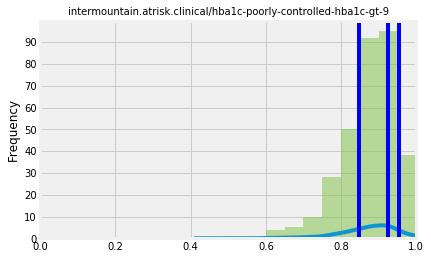

In [83]:
for fqn in s.index.get_level_values('fully_qualified_name').unique():
    ax = Benchmarks.tier_plot(s.loc[fqn], st.loc[(fqn, 'values'), 'tier1'], st.loc[(fqn, 'values'), [
        'tier2',
        'tier3'
    ]], title=fqn)
    pdf.savefig(ax)
pdf.close()

In [52]:
print(i.prsnl_group_query())


        SELECT DISTINCT
            g.*,
            p.prsnl_id
        FROM
            (
        SELECT DISTINCT
            prsnl_group_id,
            prsnl_group_mnemonic,
            prsnl_group_name
        FROM
            NORTHBAY.PH_D_Personnel_Group
        ) g
            JOIN NORTHBAY.PH_D_Personnel_Personnel_Group_Reltn p ON (
                g.prsnl_group_id = p.prsnl_group_id
            )
        


In [79]:
# i.prsnl_group_query could be used for looking at specialties
org = i.query_df(f"""
SELECT DISTINCT
    o.org_name,
    o.prsnl_id
FROM
    ({i.organization_query()}) o
WHERE
    o.prsnl_id {equal_in(inv.loc[
        'cernerstandard.diabetesmellitus.org2014.clinical/annual-eye-exam',
        'prsnl_id'
    ].unique().tolist())}
""")

In [84]:
org.to_csv('eye_exam_providers.csv')

In [83]:
print(org)

                 org_name                              prsnl_id
0    St. Mary's Providers  c2aa1cf4-71f4-410c-9be9-fb92d533d178
1        Bethel Providers  c2aa1cf4-71f4-410c-9be9-fb92d533d178
2         Aniak Providers  c2aa1cf4-71f4-410c-9be9-fb92d533d178
3    Hooper Bay Providers  6fe5b4ca-f934-4e06-bd10-6d9abe98fb12
4        Bethel Providers  79e4b1a8-9e80-4d86-82d9-4e6c2ab573b4
5        Bethel Providers  fbc9f3f9-9e18-472f-a8e1-b4d3945bb652
6       Emmonak Providers  7dc0d1d2-9d09-4eeb-9460-8f3e9358edf9
7         Aniak Providers  a790aebd-a5c0-4cd2-bdcb-19e0e16d92e5
8   Toksook Bay Providers  c2aa1cf4-71f4-410c-9be9-fb92d533d178
9         Aniak Providers  660b23f9-3c5e-4bb8-94b4-9bd31568c9ac
10      Emmonak Providers  6fe5b4ca-f934-4e06-bd10-6d9abe98fb12
11       Bethel Providers  a790aebd-a5c0-4cd2-bdcb-19e0e16d92e5
12       Bethel Providers  ed02ede7-761d-4d35-b175-7cefb9854527
13   St. Mary's Providers  95a22426-866d-4af2-81e6-c274e992b6a1
14        Aniak Providers  6fe5b4ca-f934

In [81]:
n = inv.loc[
    'cernerstandard.diabetesmellitus.org2014.clinical/annual-eye-exam'
].merge(org, how='left')

In [82]:
st.loc['cernerstandard.diabetesmellitus.org2014.clinical/annual-eye-exam']

tier,bottom,tier1,tier2,tier3
values,0,0.344344,0.57798,0.767838
prsnl_count,20,67.000000,12.00000,7.000000


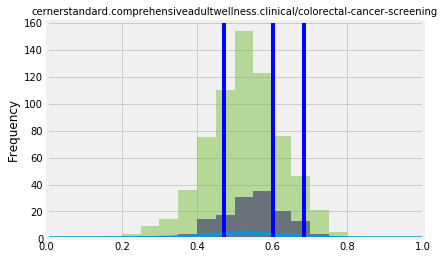

In [78]:
pdf = backend_pdf.PdfPages("LAC_CA_Harbor_UCLA_Medical_Center.pdf")
ax = Benchmarks.tier_plot(s.loc[
    'cernerstandard.comprehensiveadultwellness.clinical/colorectal-cancer-screening'
], st.loc[
    ('cernerstandard.comprehensiveadultwellness.clinical/colorectal-cancer-screening', 'values'),
    'tier1'
], st.loc[
    ('cernerstandard.comprehensiveadultwellness.clinical/colorectal-cancer-screening', 'values'),
    [
        'tier2',
        'tier3'
    ]
], title='cernerstandard.comprehensiveadultwellness.clinical/colorectal-cancer-screening')
n.loc[
    n.org_name == 'Harbor-UCLA Medical Center',
    'measure_met'
].plot.hist(bins=[i/100 for i in range(0,105,5)]);
pdf.savefig(ax)
pdf.close()

In [79]:
# writer
#What does this section do?
writer = pd.ExcelWriter('LAC_CA_Org_Tiers.xlsx', engine='xlsxwriter')

# prsnl counts
n.groupby([
    'org_name',
    'tier'
]).prsnl_id.nunique().unstack().fillna(0).sort_values([
    'tier3',
    'tier2',
    'tier1',
    'bottom'
], ascending=False).to_excel(writer, sheet_name='prsnl_counts')

# prsnl ratios
n.groupby([
    'org_name',
    'tier'
]).prsnl_id.nunique().unstack().fillna(0).sort_values([
    'tier3',
    'tier2',
    'tier1',
    'bottom'
], ascending=False).apply(lambda x : x/x.sum()).to_excel(writer, sheet_name='prsnl_ratios')

# tier3
n.loc[
    (n.org_name == 'Harbor-UCLA Medical Center') &
    (n.tier == 'tier3'),
    [
        'org_name',
        'prsnl_id',
        'tier',
        'measure_met'
    ]
].merge(df.loc[
    df.fully_qualified_name == 'cernerstandard.comprehensiveadultwellness.clinical/colorectal-cancer-screening'
]).to_excel(writer, sheet_name='tier3_majority', index=False)

# tier2
n.loc[
    (n.org_name == 'Olive View-UCLA Medical Center') &
    (n.tier == 'tier2'),
    [
        'org_name',
        'prsnl_id',
        'tier',
        'measure_met'
    ]
].merge(df.loc[
    df.fully_qualified_name == 'cernerstandard.comprehensiveadultwellness.clinical/colorectal-cancer-screening'
]).to_excel(writer, sheet_name='tier2_majority', index=False)

# tier1
n.loc[
    (n.org_name == 'DHS-Harbor-UCLA Lomita Adult') &
    (n.tier == 'tier1'),
    [
        'org_name',
        'prsnl_id',
        'tier',
        'measure_met'
    ]
].merge(df.loc[
    df.fully_qualified_name == 'cernerstandard.comprehensiveadultwellness.clinical/colorectal-cancer-screening'
]).to_excel(writer, sheet_name='tier1_majority', index=False)

# bottom
n.loc[
    (n.org_name == 'DHS-La Puente PC Adult') &
    (n.tier == 'bottom'),
    [
        'org_name',
        'prsnl_id',
        'tier',
        'measure_met'
    ]
].merge(df.loc[
    df.fully_qualified_name == 'cernerstandard.comprehensiveadultwellness.clinical/colorectal-cancer-screening'
]).to_excel(writer, sheet_name='bottom_majority', index=False)

# save
writer.save()

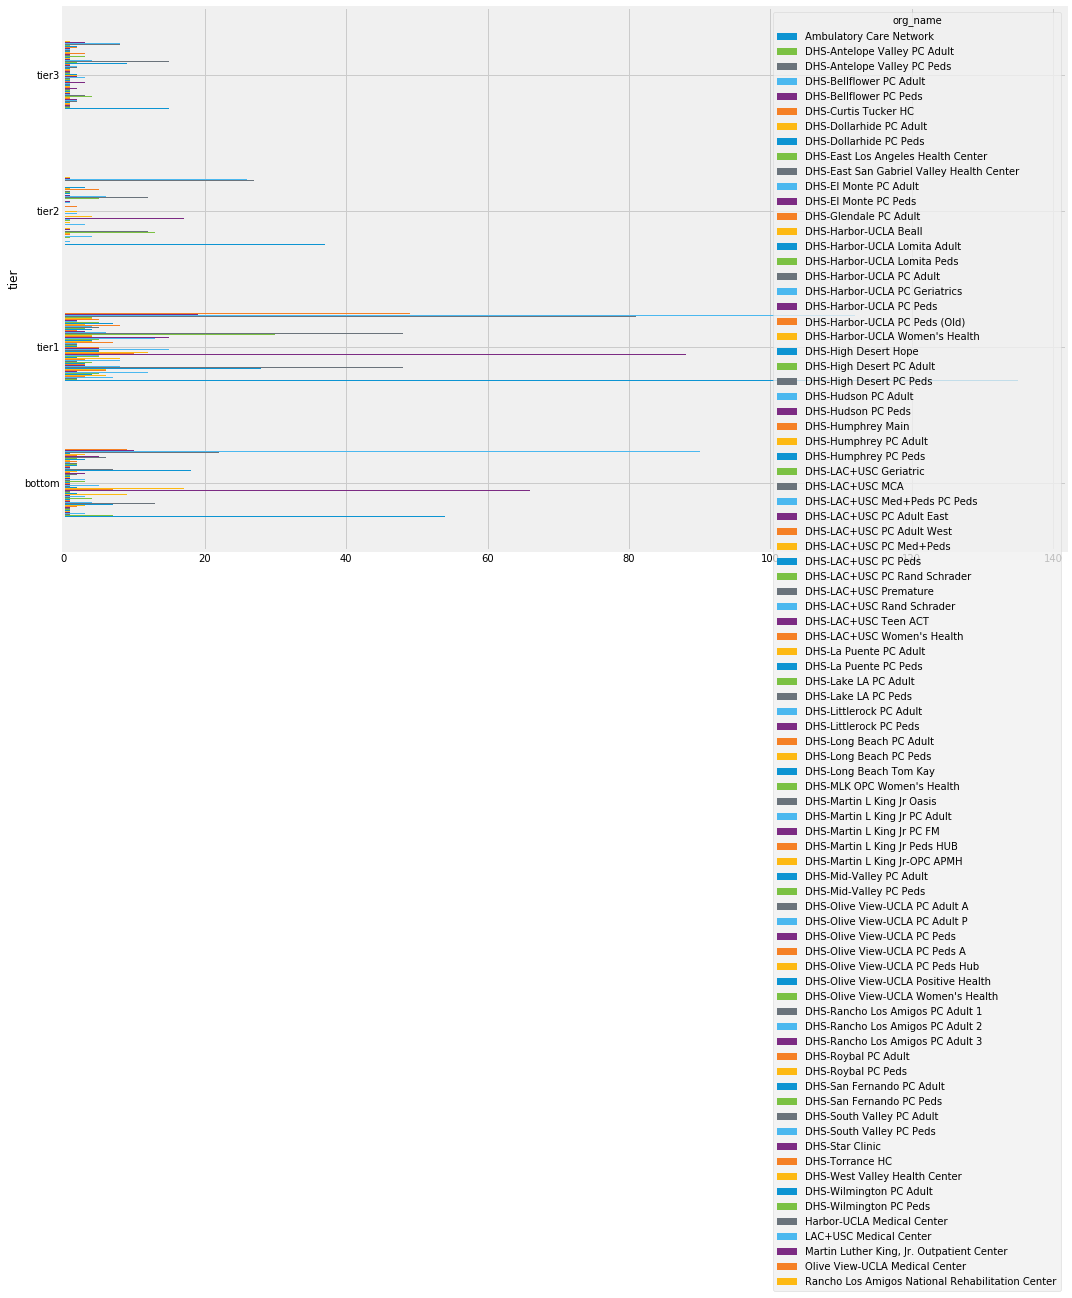

In [80]:
n.groupby([
    'tier',
    'org_name'
]).prsnl_id.nunique().unstack().fillna(0).plot.barh(figsize=(16,10));

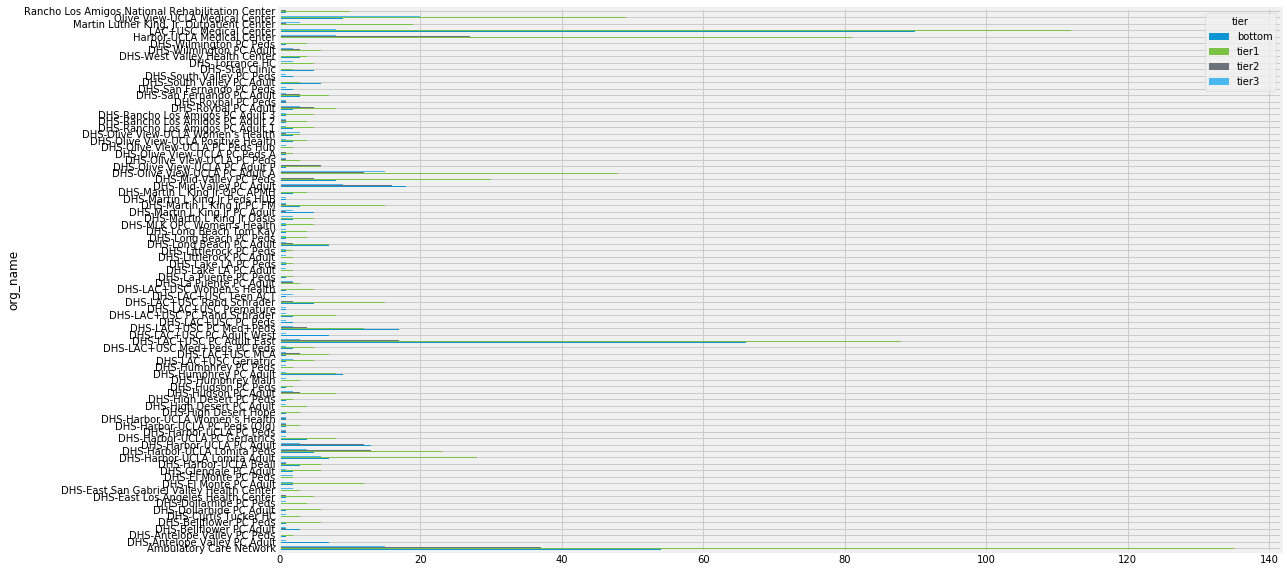

In [81]:
n.groupby([
    'org_name',
    'tier'
]).prsnl_id.nunique().unstack().fillna(0).plot.barh(figsize=(16,10));